In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors,datasets
from sklearn.model_selection import train_test_split
import numpy as np

Tải data và tách data

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data.drop('Id',axis=1,inplace=True)
data = data.values
X = data[:,:-1]
y = data[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=40)

In [ ]:
class KNN():
  def __init__(self,X,y,k=5):
    self.X = X
    self.y = y
    self.k = k # chỉ số xác định số
    self.label = set(self.y)
    self.listacc = []

  def distance(self,x1,x2):
    dist = sum((x1- x2)**2)
    return np.sqrt(dist)

  # Tính khoảng cách từ 1 điểm đến tất cả các điểm còn lại
  def list_distance(self,x):
    arr_dis = []

    for x1,y1 in zip(self.X,self.y):
      if (x1 == x).all():
        continue
      arr_dis.append([self.distance(x,x1),y1])

    arr_dis = sorted(arr_dis,key = lambda x:x[0])
    return arr_dis

  # Dự đoán class cho label dựa vào số k
  def predict(self,x):
    count = {word:0 for word in self.label}
    arr_dis = self.list_distance(x)
    for i in range(0,self.k):
      count[arr_dis[i][1]] += 1
    return max(count,key=lambda ka:count[ka])

  def accuracy(self):
    acc = 0
    for x,y1 in zip(self.X,self.y):
      y_pred = self.predict(x)
      if y_pred == y1:
        acc +=1
    return 100*acc/len(self.X)


In [ ]:
list_acc = []
for i in range(1,19,2):
  knn = KNN(X_test,y_test,i)
  list_acc.append(knn.accuracy())
kb = range(1,19,2)

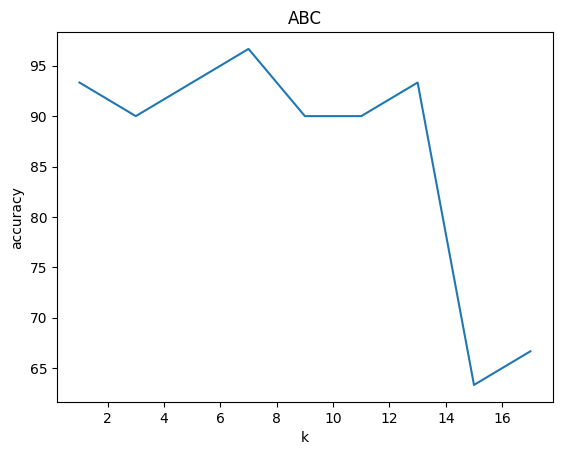

In [ ]:
plt.plot(kb,list_acc)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("ABC")
plt.show()

In [ ]:
maxa = np.argmax(list_acc)*2 + 1
print(maxa)

17


In [ ]:
knn1 = KNN(X_test,y_test,4)
knn1.accuracy()

90.0